In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras import regularizers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MIT FutureMakers/Day 14 (7 19 21)/housepricedata.csv")

In [ ]:
dataset = df.values

In [ ]:
X = dataset[:,0:10]

In [ ]:
Y = dataset[:,10]

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [ ]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [ ]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 13s 16ms/step - loss: 0.6713 - accuracy: 0.5152 - val_loss: 0.6616 - val_accuracy: 0.5114
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6655 - accuracy: 0.5196 - val_loss: 0.6540 - val_accuracy: 0.5845
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6539 - accuracy: 0.6194 - val_loss: 0.6469 - val_accuracy: 0.6804
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6460 - accuracy: 0.7261 - val_loss: 0.6392 - val_accuracy: 0.7215
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6408 - accuracy: 0.7373 - val_loss: 0.6314 - val_accuracy: 0.7397
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.7453 - val_loss: 0.6237 - val_accuracy: 0.7580
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6267 - accuracy: 0.7620 - val_loss: 0.6159 - val_accuracy: 0.7626
Epoch 8/100

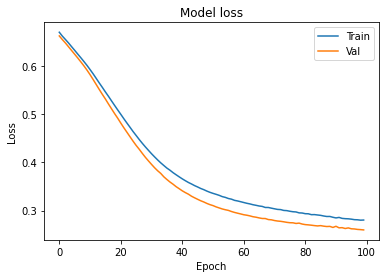

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

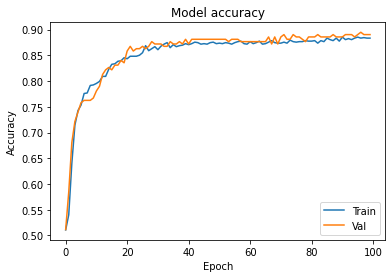

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [ ]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 39ms/step - loss: 0.5630 - accuracy: 0.6880 - val_loss: 0.3311 - val_accuracy: 0.8676
Epoch 2/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3353 - accuracy: 0.8478 - val_loss: 0.3020 - val_accuracy: 0.8813
Epoch 3/100
32/32 [==============================] - 1s 30ms/step - loss: 0.2998 - accuracy: 0.8805 - val_loss: 0.3245 - val_accuracy: 0.8539
Epoch 4/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3144 - accuracy: 0.8618 - val_loss: 0.3124 - val_accuracy: 0.8493
Epoch 5/100
32/32 [==============================] - 1s 30ms/step - loss: 0.2703 - accuracy: 0.8803 - val_loss: 0.2751 - val_accuracy: 0.8950
Epoch 6/100
32/32 [==============================] - 1s 29ms/step - loss: 0.2572 - accuracy: 0.8874 - val_loss: 0.2736 - val_accuracy: 0.8904
Epoch 7/100
32/32 [==============================] - 1s 30ms/step - loss: 0.2498 - accuracy: 0.8945 - val_loss: 0.2177 - val_accuracy: 0.9041
Epoch 

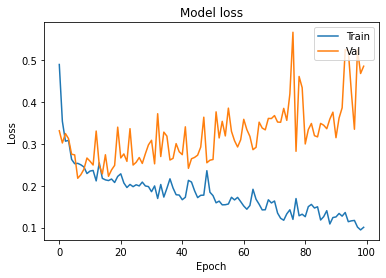

In [ ]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

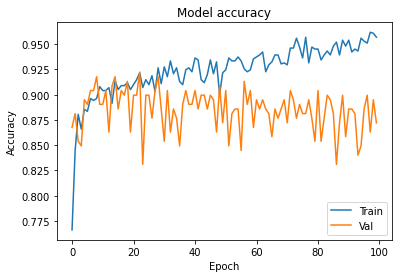

In [ ]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [ ]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 52ms/step - loss: 21.1203 - accuracy: 0.5700 - val_loss: 3.9022 - val_accuracy: 0.7123
Epoch 2/100
32/32 [==============================] - 1s 40ms/step - loss: 2.5176 - accuracy: 0.7833 - val_loss: 0.6490 - val_accuracy: 0.8493
Epoch 3/100
32/32 [==============================] - 1s 40ms/step - loss: 0.6321 - accuracy: 0.8452 - val_loss: 0.4979 - val_accuracy: 0.8767
Epoch 4/100
32/32 [==============================] - 1s 41ms/step - loss: 0.5385 - accuracy: 0.8602 - val_loss: 0.4736 - val_accuracy: 0.8767
Epoch 5/100
32/32 [==============================] - 1s 41ms/step - loss: 0.5101 - accuracy: 0.8652 - val_loss: 0.4720 - val_accuracy: 0.8767
Epoch 6/100
32/32 [==============================] - 1s 40ms/step - loss: 0.4602 - accuracy: 0.8807 - val_loss: 0.4377 - val_accuracy: 0.8950
Epoch 7/100
32/32 [==============================] - 1s 40ms/step - loss: 0.4748 - accuracy: 0.8642 - val_loss: 0.4356 - val_accuracy: 0.8995
Epoch

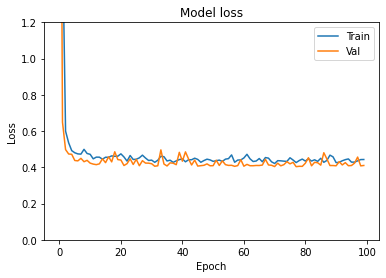

In [ ]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

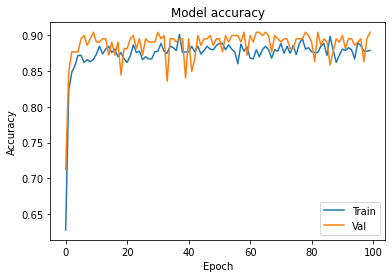

In [ ]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()